In [5]:
from selenium import webdriver
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen, Request
import numpy as np
import seaborn as sns
from selenium_firefox import Firefox

In [6]:
binary = FirefoxBinary('C:/Program Files (x86)/Mozilla Firefox/firefox.exe')
driver = webdriver.Firefox(firefox_binary=binary, executable_path="C:/Users/MEDINA TECH/Downloads/geckodriver-v0.32.0-win32/geckodriver.exe")
fuels = [] 
prices = [] 
driver.get("https://carzaty.com/ae-en/buy?utm_source=DAmenulink&utm_medium=drivearabia&utm_campaign=aeEN")
# html = urlopen(url)
# scrap = BeautifulSoup(html,'lxml')
# print(scrap)

<ipython-input-6-d55e6703389f>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(firefox_binary=binary, executable_path="C:/Users/MEDINA TECH/Downloads/geckodriver-v0.32.0-win32/geckodriver.exe")
<ipython-input-6-d55e6703389f>:2: DeprecationWarning: firefox_binary has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(firefox_binary=binary, executable_path="C:/Users/MEDINA TECH/Downloads/geckodriver-v0.32.0-win32/geckodriver.exe")


In [20]:
content = driver.page_source
scrap = BeautifulSoup(content)
# for containers in scrap.findAll('a', {'class':"_1fQZEK"}):
name = scrap.find('div', attrs={'class':"_4rR01T"})
price = scrap.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
rating = scrap.find('div', attrs={'class':'_3LWZlK'})
products.append(name.text)
prices.append(price.text)
ratings.append(rating.text)

In [21]:
df = pd.DataFrame({'Name':products,'Price':prices,'Rating':ratings}) 
df.to_csv('products.csv', index=False, encoding='utf-8')

<AxesSubplot:xlabel='Rating', ylabel='Price'>

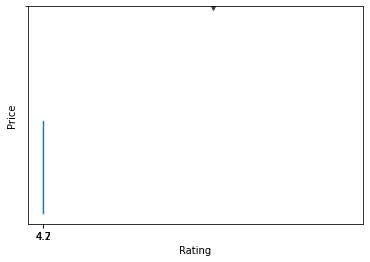

In [27]:
df['Price'] = df['Price'].replace({',':''}, regex=True)
df['Price'] = df['Price'].astype(np.float)
sns.boxplot(x=df['Price'])
df['Rating'] = df['Rating'].astype(np.float)
sns.barplot(x=df['Rating'], y=df['Price'])
sns.lineplot(x=df['Rating'], y=df['Price'])

In [8]:
#For carzaty-drive-arabia
content = driver.page_source
scrap = BeautifulSoup(content)
quantity = scrap.find('span', attrs={'class':"value-02"})
fuels.append(quantity.text)

In [9]:
df = pd.DataFrame({'Quantity':fuels}) 
print(df)
df.to_csv('car_details.csv', index=False, encoding='utf-8')

  Quantity
0     3.6L


<AxesSubplot:xlabel='Quantity'>

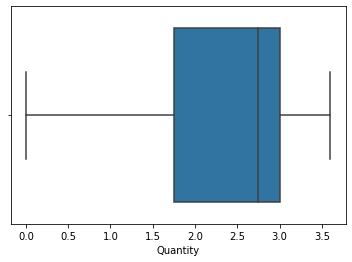

In [15]:
import pandas as pd
df = pd.read_csv('car_details.csv')
df['Quantity'] = df['Quantity'].replace({',':''}, regex=True)
df['Quantity'] = df['Quantity'].astype(np.float)
sns.boxplot(x=df['Quantity'])